In [165]:
# importing libraries
import numpy as np
import pandas as pd

In [166]:
data = pd.read_csv('Task2_Data.csv')
data.head()

,CustomerID,Name,Gender,Age,Annual Income (k$),Spending Score (1-100),Address,Occupation,City
0,1,Luis Jackson,Male,19,15,39,"7294 Scott Harbor Apt. 602\nNorth Tammytown, W...","Teacher, music",Brandonshire
1,2,Nicole Cruz,Male,21,15,81,"67557 Moody Roads\nLake Johnshire, PW 59047",Product manager,Ariasstad
2,3,Linda Brooks,Female,20,16,6,"090 Hancock Highway\nSouth Patriciaview, DC 65170",Sub,North Shaneville
3,4,Steven Morgan,Female,23,16,77,"6532 Amanda Mission Apt. 406\nHollyburgh, RI 9...",Administrator,Lake Rebecca
4,5,Kelly Evans,Female,31,17,40,"27141 Lawrence Plains\nGaryfurt, WV 94124",Occupational therapist,Adamsborough


In [167]:
# dropping unnecessary columns
data.drop(['CustomerID','Name','Address','Occupation'], axis=1, inplace=True)

# converting categorical data to numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in data.columns:
    if i not in ['Age','Annual Income (k$)','Spending Score (1-100)']:
        data[i] = le.fit_transform(data[i])
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),City
0,1,19,15,39,237
1,1,21,15,81,130
2,0,20,16,6,2771
3,0,23,16,77,1758
4,0,31,17,40,8


What are the features used in this dataset for customer segmentation?

In [168]:
data.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'City'],
      dtype='object')

In [169]:
# so the features used for customer segmentation are:
    # 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'

What is the distribution of the 'Age' feature in the dataset?

In [170]:
data['Age'].describe()

count    5200.000000
mean       43.758269
std        15.222913
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: Age, dtype: float64

In [171]:
# so the age of the customers ranges from 18 to 70
# the mean age is 43.8
# the standard deviation is 15.2

Which feature has the highest correlation with the 'Spending Score (1-100)' feature?

<AxesSubplot: >

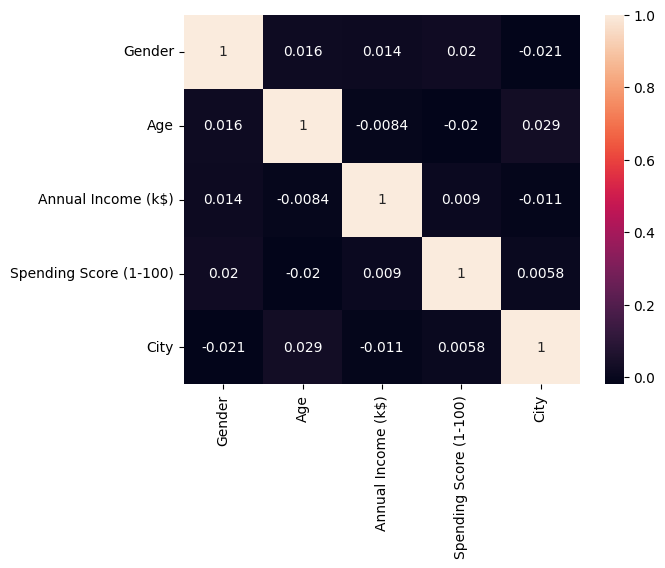

In [172]:
import seaborn as sns

data.corr()
sns.heatmap(data.corr(), annot=True)

In [173]:
# so the correlation between the features is not very high
# the highest correlation is between 'Gender' and 'Spending Score'

What is the optimal number of clusters for customer segmentation according to the Elbow Method?

/Users/carbon/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/carbon/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/carbon/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/carbon/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/carbo

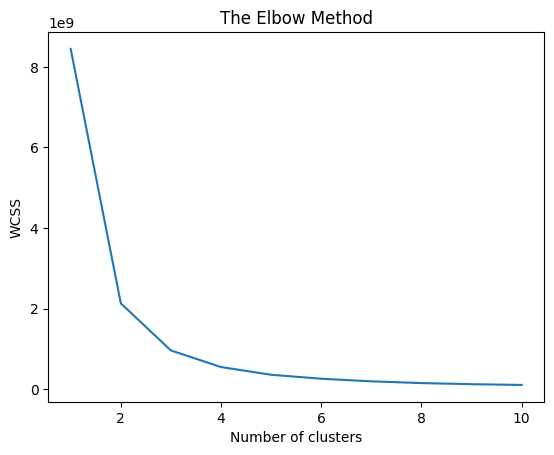

In [174]:
# What is the optimal number of clusters for customer segmentation according to the Elbow Method?

# drawing the elbow plot
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

import matplotlib.pyplot as plt

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [175]:
# so the optimal number of clusters is 3 according to the elbow method

What is the average annual income of customers in the dataset?

In [176]:
data['Annual Income (k$)'].mean()

105.17423076923077

What is the average spending score of male customers in the dataset?

In [177]:
data[data['Gender'] == 1]['Spending Score (1-100)'].mean()

50.43823760818253

In [178]:
# performing k-means clustering for next tasks

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(data)

# adding the cluster labels to the dataset
data['Cluster'] = y_kmeans

/Users/carbon/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Which cluster has the highest average income and spending score?

In [179]:
data.groupby('Cluster').mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100),City
Cluster,,,,,
0,0.486345,43.432888,105.776874,49.409064,2207.087740
1,0.496782,43.300176,105.898771,49.800468,745.038619
2,0.483616,44.516949,103.888701,50.309605,3678.781921


In [180]:
# According to the above table, cluster 1 has the highest average income and spending score, although Spending Score is not highest but quite close to the highest

What is the percentage of customers in Cluster 1?

In [181]:
temp = data[data['Cluster'] == 0]
len(temp)/len(data) * 100

33.09615384615385

What is the most frequent age group in Cluster 2?

In [182]:
temp = data[data['Cluster'] == 1]
temp['Age'].value_counts().head(1)

36    47
Name: Age, dtype: int64

In [183]:
# so the most common age in cluster 2 is 36, with a frequency of 47

What is the average income of customers in Cluster 3?

In [184]:
temp = data[data['Cluster'] == 2]
temp['Annual Income (k$)'].mean()

103.88870056497176

Show the count of value in each cluster.

In [185]:
data['Cluster'].value_counts()

2    1770
0    1721
1    1709
Name: Cluster, dtype: int64

Make a visualization of the clusters.

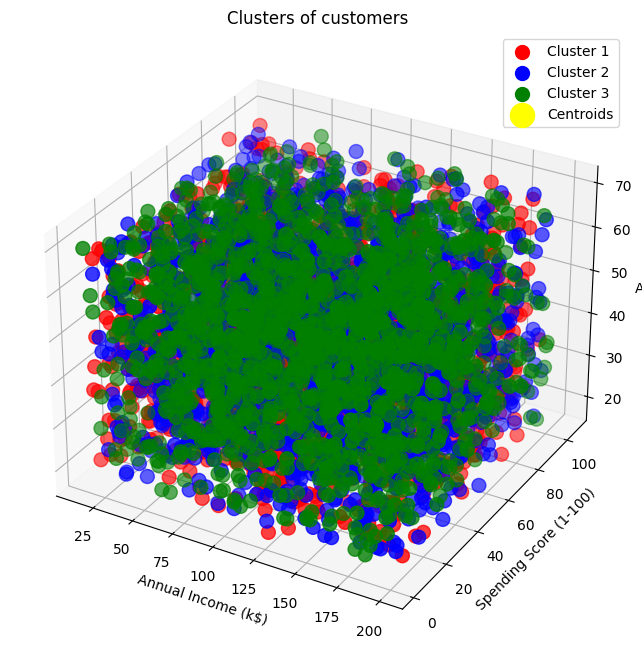

In [186]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[y_kmeans == 0]['Annual Income (k$)'], data[y_kmeans == 0]['Spending Score (1-100)'], data[y_kmeans == 0]['Age'], s=100, c='red', label='Cluster 1')
ax.scatter(data[y_kmeans == 1]['Annual Income (k$)'], data[y_kmeans == 1]['Spending Score (1-100)'], data[y_kmeans == 1]['Age'], s=100, c='blue', label='Cluster 2')
ax.scatter(data[y_kmeans == 2]['Annual Income (k$)'], data[y_kmeans == 2]['Spending Score (1-100)'], data[y_kmeans == 2]['Age'], s=100, c='green', label='Cluster 3')
ax.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
ax.set_title('Clusters of customers')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
ax.legend()
plt.show()

Now Take the 3 features (["Age","Annual Income (k$)","Spending Score (1-100)"]) and
repeat steps from 11 to 13.

In [187]:
data = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# appllying k-means clustering on the data
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(data)

data['Cluster'] = y_kmeans
data.head()

/Users/carbon/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,2
1,21,15,81,2
2,20,16,6,2
3,23,16,77,2
4,31,17,40,2


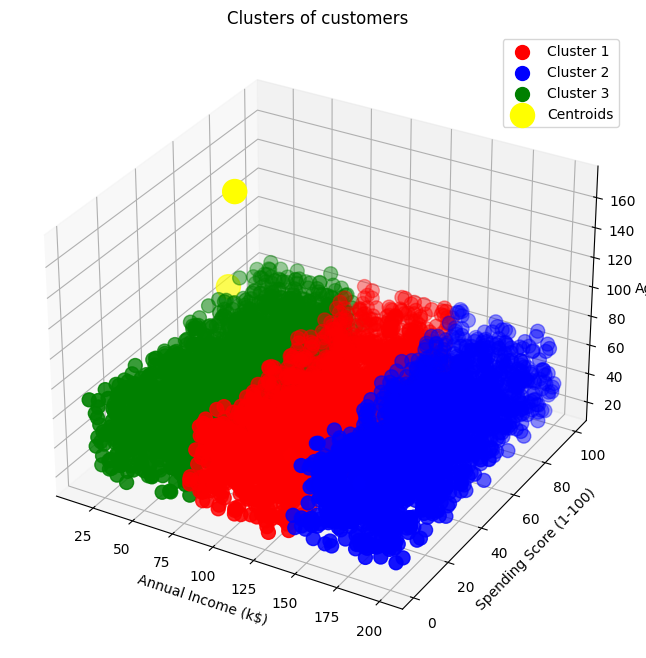

In [188]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[y_kmeans == 0]['Annual Income (k$)'], data[y_kmeans == 0]['Spending Score (1-100)'], data[y_kmeans == 0]['Age'], s=100, c='red', label='Cluster 1')
ax.scatter(data[y_kmeans == 1]['Annual Income (k$)'], data[y_kmeans == 1]['Spending Score (1-100)'], data[y_kmeans == 1]['Age'], s=100, c='blue', label='Cluster 2')
ax.scatter(data[y_kmeans == 2]['Annual Income (k$)'], data[y_kmeans == 2]['Spending Score (1-100)'], data[y_kmeans == 2]['Age'], s=100, c='green', label='Cluster 3')
ax.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
ax.set_title('Clusters of customers')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
ax.legend()
plt.show()